# Проект телекоммуникации 
                                            
                                            

## Введение

## Цель проекта:
Целью проекта является разработка модели прогнозирования оттока клиентов для оператора связи "Ниединогоразрыва.ком". Модель будет основываться на анализе данных о клиентах, их услугах и договорах, а также на применении методов машинного обучения для определения клиентов, которые могут покинуть оператора в будущем. Это позволит оператору предложить специальные условия и стимулирующие акции для удержания таких клиентов.

## Задачи проекта:
1. **Подготовка данных:**
   - Объединение данных из файлов contract_new.csv, personal_new.csv, internet_new.csv и phone_new.csv.


2. **Исследовательский анализ данных (EDA):**
   - Анализ распределений признаков и статистик.
   - Визуализация данных для выявления паттернов.
   

3. **Отбор признаков:**
   - Исследование корреляций между признаками.
   - Выявление наиболее значимых признаков, влияющих на отток клиентов.
   

4. **Построение модели:**
   - Выбор подходящего алгоритма машинного обучения.
   - Разделение данных на обучающую и тестовую выборки.
   - Обучение модели на обучающих данных.
   

5. **Оценка модели:**
   - Использование метрик (ROC-AUC, accuracy) для оценки производительности модели.
   - Оптимизация гиперпараметров модели для достижения наилучшей производительности.
   - Анализ результатов прогнозирования: А) анализ важности признаков; Б) анализ матрицы ошибок
   
   
6. **Написание отчета**


## Оглавление:
1. Введение
   - Описание задачи
   - Значимость прогнозирования оттока для оператора связи
   

2. Подготовка данных
   - Обзор исходных данных
   - Объединение данных из разных файлов
   
   
3. Исследовательский анализ данных (EDA)
   - Анализ распределений признаков
   - Визуализация данных
   

4. Отбор признаков
   - Исследование корреляций между признаками.
   - Выявление ключевых признаков, влияющих на отток
   

5. Построение и обучение модели
   - Выбор алгоритма машинного обучения
   - Разделение данных на выборки
   - Обучение модели
   

6. Оценка модели
   - Используемые метрики оценки
   - Оптимизация параметров модели
   - Анализ результатов прогнозирования: А) анализ важности признаков; Б) анализ матрицы ошибок 
   

7. Отчет

In [1]:
!pip install phik
!pip install shap
!pip install -U imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import shap
import phik

In [2]:
# Загрузка данных из файлов
contract_data = pd.read_csv("/datasets/contract_new.csv")
personal_data = pd.read_csv("/datasets/personal_new.csv")
internet_data = pd.read_csv("/datasets/internet_new.csv")
phone_data = pd.read_csv("/datasets/phone_new.csv")

In [3]:
# Загрузка данных из файлов
#contract_data = pd.read_csv('C:/Users/Kurban/Downloads/contract_new.csv')
#personal_data = pd.read_csv('C:/Users/Kurban/Downloads/personal_new.csv')
#internet_data = pd.read_csv('C:/Users/Kurban/Downloads/internet_new.csv')
#phone_data = pd.read_csv("C:/Users/Kurban/Downloads/phone_new.csv")

Функция, которая объединяет использование методов describe, head, tail, shape и info, isnull и sum для каждого датасета

###  Подготовка и исследовательский анализ данных 

In [4]:
def explore_dataset(dataset_name, dataset):
    # Вывод информации о датасете
    print(f"Исследуем датасет {dataset_name}:")

    # Вывод размерности датасета
    print("Размер:")
    print(dataset.shape)

    # Вывод общей информации о датасете, включая количество пропущенных значений
    print("\nИнформация:")
    print(dataset.info())

    # Выявление пропущенных значений
    missing_values = dataset.isnull().sum()
    print("\nПропущенные значения:")
    print(missing_values)

    # Вывод первых нескольких строк датасета
    print("\nПервые строки:")
    print(dataset.head())

    # Вывод последних нескольких строк датасета
    print("\nПоследние строки:")
    print(dataset.tail())

    # Вывод статистики по числовым признакам
    print("\nОписательная статистика:")
    print(dataset.describe())

    print("\n---------------------------\n")

In [5]:
# Исследование каждого датасета
explore_dataset("Договор", contract_data)

Исследуем датасет Договор:
Размер:
(7043, 8)

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Пропущенные значения:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Первые строки:
   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-V

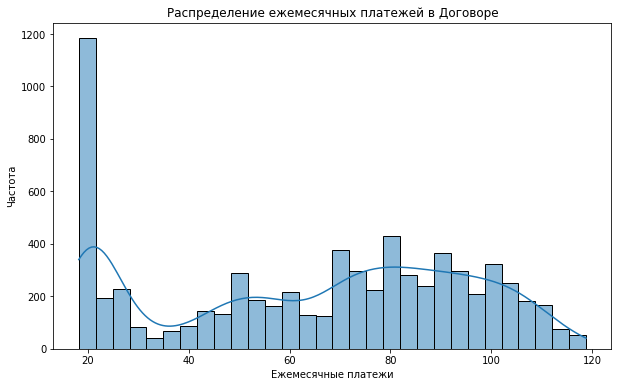

In [6]:
# Гистограмма распределения ежемесячных платежей
plt.figure(figsize=(10, 6))
sns.histplot(data=contract_data, x="MonthlyCharges", bins=30, kde=True)
plt.title("Распределение ежемесячных платежей в Договоре")
plt.xlabel("Ежемесячные платежи")
plt.ylabel("Частота")
plt.show()

Из данного графика можно сделать вывод, что наибольшее количество клиентов имеют ежемесячные платежи в диапазоне до 100 долларов. Однако, интересно заметить, что имеется большой пик в районе 20 тысяч долларов ежемесячных платежей, что может указывать на какой-то особый план или услугу среди небольшой группы клиентов, которые платят именно эту сумму.

In [7]:
explore_dataset("Персональные данные", personal_data)

Исследуем датасет Персональные данные:
Размер:
(7043, 5)

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Пропущенные значения:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Первые строки:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0   

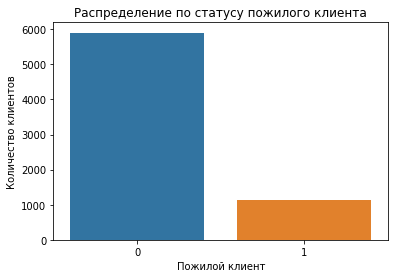

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=personal_data, x='SeniorCitizen')
plt.title("Распределение по статусу пожилого клиента")
plt.xlabel("Пожилой клиент")
plt.ylabel("Количество клиентов")
plt.show()

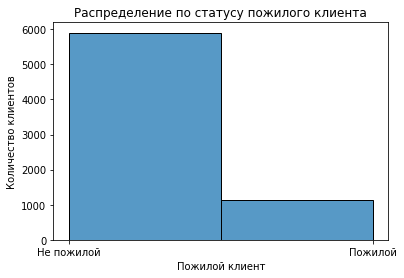

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=personal_data, x='SeniorCitizen', bins=2, kde=False)
plt.title("Распределение по статусу пожилого клиента")
plt.xlabel("Пожилой клиент")
plt.ylabel("Количество клиентов")
plt.xticks([0, 1], ['Не пожилой', 'Пожилой'])
plt.show()

In [10]:
explore_dataset("Интернет-услуги", internet_data)

Исследуем датасет Интернет-услуги:
Размер:
(5517, 8)

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Пропущенные значения:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Первые строки:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG  

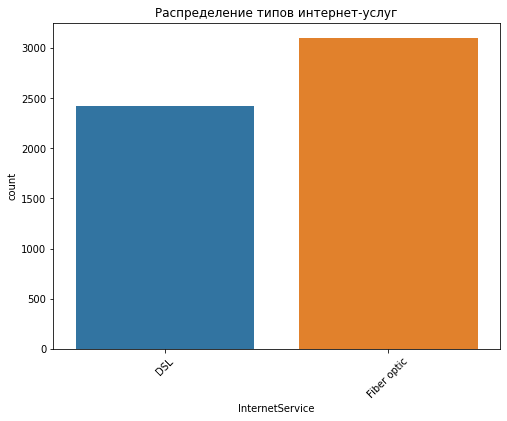

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x="InternetService")
plt.title("Распределение типов интернет-услуг")
plt.xticks(rotation=45)
plt.show()

На основании визуализации исследования датасета "Интернет-услуги" можно сделать вывод, что тип интернет-услуги "Fiber optic" более распространен среди клиентов по сравнению с типом "DSL".

In [12]:
explore_dataset("Услуги телефонии", phone_data)

Исследуем датасет Услуги телефонии:
Размер:
(6361, 2)

Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Пропущенные значения:
customerID       0
MultipleLines    0
dtype: int64

Первые строки:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Последние строки:
      customerID MultipleLines
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No

Описательная статистика:
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     1587-FKLZB   

Исследование датасета "Договор" позволило выявить следующие наблюдения:

- В датасете содержится информация о 7043 договорах.
- Основные характеристики договоров включают:
  - Номер клиента ("customerID").
  - Дату начала договора ("BeginDate").
  - Дату окончания договора ("EndDate").
  - Тип договора ("Type").
  - Способ оплаты ("PaymentMethod").
  - Ежемесячную плату ("MonthlyCharges").
  - Общую сумму платежей ("TotalCharges").
  - Показатель бумажного либо бесбумажного биллинга ("PaperlessBilling").

- В результате анализа датасета:
  - Не выявлено пропущенных значений в столбцах.
  - Среди типов договоров преобладают "Month-to-month" (ежемесячный) и "Two year" (двухгодичный), с "One year" (годовой) договором наименее распространенным.
  - Самый распространенный способ оплаты – "Electronic check" (электронный чек).
  - Ежемесячные платежи варьируются от 18.25 до 118.75, среднее значение около 64.76.
  - Сумма общих платежей также разнообразна и зависит от типа договора и ежемесячной платы.

На основе этого анализа можно сделать вывод о разнообразии договоров, способах оплаты и распределении ежемесячных платежей. Эти данные могут быть использованы для определения стратегий управления клиентами, прогнозирования доходов и оптимизации услуг.

Исследование датасета "Персональные данные" позволило выявить следующее:

В данном датасете представлено 7043 записи о клиентах.
Столбец "SeniorCitizen" указывает на статус пожилого клиента, где 1 означает, что клиент является пожилым, а 0 – что не пожилым.
В результате анализа столбца "SeniorCitizen" выяснилось, что количество не пожилых клиентов составляет около 6000, тогда как пожилых клиентов – менее 1000. Это позволяет сделать вывод о том, что основная часть клиентов не является пожилыми.
Этот вывод может быть полезным при формировании стратегий обслуживания и маркетинговых кампаний, учитывая, что пожилые и не пожилые клиенты могут иметь разные потребности и предпочтения.


Анализ датасета "Интернет-услуги" позволяет сделать следующие выводы:

- В датасете представлена информация о 5517 записях о клиентах и их использовании интернет-услуг.
- Основные атрибуты включают:
  - Номер клиента ("customerID").
  - Тип интернет-сервиса ("InternetService").
  - Наличие защиты онлайн ("OnlineSecurity").
  - Наличие резервного копирования онлайн ("OnlineBackup").
  - Наличие защиты устройства ("DeviceProtection").
  - Наличие технической поддержки ("TechSupport").
  - Наличие потокового телевидения ("StreamingTV").
  - Наличие потокового кино ("StreamingMovies").

- Выводы из анализа:
  - В столбце "InternetService" наиболее распространенным типом интернет-сервиса является "Fiber optic", который составляет большую часть предоставленных услуг.
  - Среди клиентов предоставляется разнообразие услуг безопасности, резервного копирования, защиты устройства, технической поддержки, потокового телевидения и кино.
  - "Fiber optic" предоставляет максимальное количество услуг, что может объяснить его более высокую популярность среди клиентов.
  - Сервисы безопасности и резервного копирования чаще отсутствуют у пользователей "Fiber optic".

На основе этих наблюдений можно сделать вывод, что "Fiber optic" – наиболее востребованный тип интернет-сервиса среди клиентов. Однако некоторые дополнительные услуги, такие как защита онлайн и резервное копирование, часто отсутствуют для клиентов этого типа интернет-сервиса. Это может быть полезной информацией для дальнейшего анализа и улучшения предоставляемых услуг.

Из анализа датасета "Услуги телефонии" (Phone Services) можно сделать следующие выводы:

Датасет содержит информацию о клиентах и наличии у них дополнительных линий связи ("MultipleLines").

Всего в датасете 6361 записей.
Пропущенных значений нет.
Большинство клиентов (более половины) не использует дополнительные линии связи (MultipleLines = "No").
Около половины клиентов использует дополнительные линии связи (MultipleLines = "Yes"). 

### Отбор признаков

In [13]:
# Объединение данных по общему идентификатору customerID
merged_data = contract_data.merge(personal_data, on="customerID", how="inner")
merged_data = merged_data.merge(internet_data, on="customerID", how="left")
merged_data = merged_data.merge(phone_data, on="customerID", how="left")

# Результат объединения данных
print(explore_dataset("Объединенные данные", merged_data))

Исследуем датасет Объединенные данные:
Размер:
(7043, 20)

Информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  

In [14]:
# формируем целевую переменную
merged_data['Churn'] = merged_data['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [15]:
merged_data.isnull().sum().sort_values()/merged_data.shape[0]*100

customerID           0.000000
Dependents           0.000000
SeniorCitizen        0.000000
gender               0.000000
TotalCharges         0.000000
MonthlyCharges       0.000000
Partner              0.000000
PaperlessBilling     0.000000
Type                 0.000000
EndDate              0.000000
BeginDate            0.000000
PaymentMethod        0.000000
Churn                0.000000
MultipleLines        9.683374
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
dtype: float64

In [16]:
# Список столбцов с пропущенными значениями
columns_with_missing_values = [
    'MultipleLines', 'StreamingMovies', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV'
]

In [17]:
# Создаем DataFrame, содержащий только столбцы с пропущенными значениями и столбец 'Type', и создаем его копию
missing_data = merged_data[columns_with_missing_values + ['Type']].copy()

# Удаляем столбец 'Type' перед группировкой
missing_data.drop(columns=['Type'], inplace=True)

# Группируем данные по типам договоров и подсчитываем количество пропущенных значений для каждого столбца
missing_counts_by_contract_type = missing_data.groupby(merged_data['Type']).apply(lambda x: x.isnull().sum()).reset_index()

# Изменяем имена столбцов для лучшего понимания
missing_counts_by_contract_type.columns = ['Type', 'MissingCounts_MultipleLines', 'MissingCounts_StreamingMovies', 'MissingCounts_InternetService', 'MissingCounts_OnlineSecurity', 'MissingCounts_OnlineBackup', 'MissingCounts_DeviceProtection', 'MissingCounts_TechSupport', 'MissingCounts_StreamingTV']

# Отображаем результат
print(missing_counts_by_contract_type)

             Type  MissingCounts_MultipleLines  MissingCounts_StreamingMovies  \
0  Month-to-month                          376                            524   
1        One year                          145                            364   
2        Two year                          161                            638   

   MissingCounts_InternetService  MissingCounts_OnlineSecurity  \
0                            524                           524   
1                            364                           364   
2                            638                           638   

   MissingCounts_OnlineBackup  MissingCounts_DeviceProtection  \
0                         524                             524   
1                         364                             364   
2                         638                             638   

   MissingCounts_TechSupport  MissingCounts_StreamingTV  
0                        524                        524  
1                        364     

MultipleLines:

Тип договора "Month-to-month" имеет 376 пропущенных значений.
Тип договора "One year" имеет 145 пропущенных значений.
Тип договора "Two year" имеет 161 пропущенных значений.
Вывод: Пропуски в признаке "MultipleLines" наблюдаются в каждом типе договора, причем наибольшее количество пропусков отмечено для типа договора "Month-to-month".

StreamingMovies:

Тип договора "Month-to-month" имеет 524 пропущенных значения.
Тип договора "One year" имеет 364 пропущенных значения.
Тип договора "Two year" имеет 638 пропущенных значения.
Вывод: Пропуски в признаке "StreamingMovies" также наблюдаются в каждом типе договора, и наибольшее количество пропусков отмечено для типа договора "Two year".

InternetService:

Тип договора "Month-to-month" имеет 524 пропущенных значения.
Тип договора "One year" имеет 364 пропущенных значения.
Тип договора "Two year" имеет 638 пропущенных значения.
Вывод: Пропуски в признаке "InternetService" также присутствуют в каждом типе договора, с наибольшим количеством пропусков в типе договора "Two year".

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV:

Для каждого из этих признаков ситуация аналогична: пропущенные значения есть в каждом типе договора, и наибольшее количество пропусков наблюдается для типа договора "Two year".

In [18]:
# Заменим все пропущенные значения во всем датафрейме на "Nopackage"

for feature in columns_with_missing_values:
    merged_data[feature] = merged_data[feature].fillna('Nopackage')

In [19]:
explore_dataset("Объединенные данные", merged_data)

Исследуем датасет Объединенные данные:
Размер:
(7043, 21)

Информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  

In [20]:
merged_data['BeginDate'] = pd.to_datetime(merged_data['BeginDate'], format='%Y-%m-%d')

In [21]:
# Заменяем "No" на '2020-02-01'
merged_data['EndDate'] = merged_data['EndDate'].replace('No', '2020-02-01')

# Преобразуем столбец 'EndDate' в формат datetime
merged_data['EndDate'] = pd.to_datetime(merged_data['EndDate'], format='%Y-%m-%d')

In [22]:
# Создание нового признака - длительности контракта
merged_data['ContractDuration'] = (merged_data['EndDate'] - merged_data['BeginDate']).dt.days

In [23]:
merged_data['ContractDuration']

0         31
1       1036
2        123
3       1371
4        153
        ... 
7038     730
7039    2191
7040     337
7041     215
7042    2010
Name: ContractDuration, Length: 7043, dtype: int64

In [24]:
merged_data.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [25]:
# Преобразуем столбец 'TotalCharges'  в числовой формат
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')

In [26]:
merged_data['TotalCharges'].isnull().sum()

11

In [27]:
missing_total_charges = merged_data[merged_data['TotalCharges'].isnull()]
print(missing_total_charges)

      customerID      Type PaperlessBilling              PaymentMethod  \
488   4472-LVYGI  Two year              Yes  Bank transfer (automatic)   
753   3115-CZMZD  Two year               No               Mailed check   
936   5709-LVOEQ  Two year               No               Mailed check   
1082  4367-NUYAO  Two year               No               Mailed check   
1340  1371-DWPAZ  Two year               No    Credit card (automatic)   
3331  7644-OMVMY  Two year               No               Mailed check   
3826  3213-VVOLG  Two year               No               Mailed check   
4380  2520-SGTTA  Two year               No               Mailed check   
5218  2923-ARZLG  One year              Yes               Mailed check   
6670  4075-WKNIU  Two year               No               Mailed check   
6754  2775-SEFEE  Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  gender  SeniorCitizen Partner Dependents  \
488            52.55           

In [28]:
# Заполняем пропущенные значения в 'TotalCharges' нулем
merged_data['TotalCharges'].fillna(0, inplace=True)

In [29]:
# Привожу к object
merged_data['SeniorCitizen'] = merged_data['SeniorCitizen'].astype('object')

In [30]:
# Удаляем столбец customerID
merged_data.drop('customerID', axis=1, inplace=True)

In [31]:
explore_dataset("Объединенные данные", merged_data)

Исследуем датасет Объединенные данные:
Размер:
(7043, 19)

Информация:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   object 
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   

In [32]:
# Выбираем все столбцы, которые мы хотим включить в анализ
selected_features = [
    'Type', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

# Создаем подмножество данных с выбранными признаками
subset_data = merged_data[selected_features]

# Выполняем анализ корреляции с использованием phik
correlation_matrix = phik.phik_matrix(subset_data, interval_cols=['MonthlyCharges', 'TotalCharges', 'ContractDuration'])

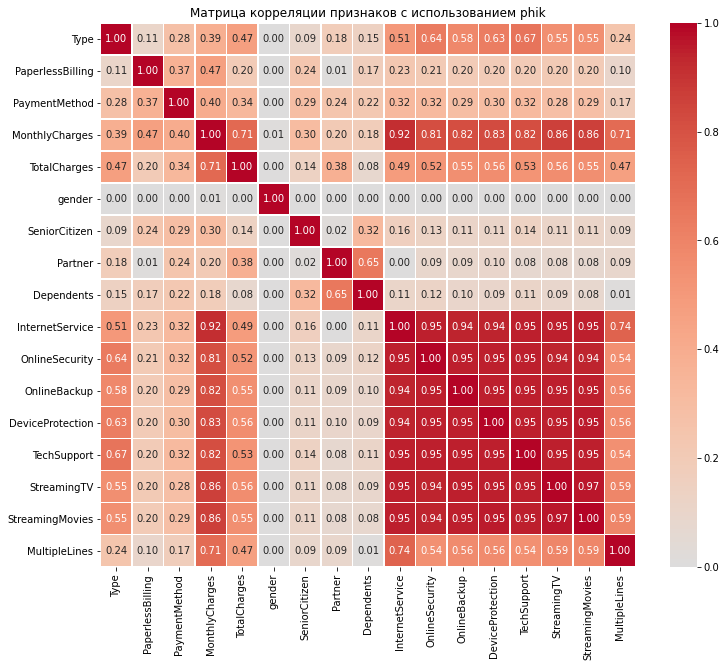

In [33]:
# Строим тепловую карту корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции признаков с использованием phik")
plt.show()

Важно отметить следующие наблюдения:

1. Столбцы "MonthlyCharges" и "TotalCharges" имеют сильную положительную корреляцию (коэффициент корреляции близок к 1). Это может указывать на то, что клиенты с более высоким ежемесячным платежом также имеют более высокие общие платежи.

2. Столбец "Partner" имеет относительно высокую положительную корреляцию с "Dependents" (0.65). Это может означать, что клиенты, имеющие партнера, также часто имеют иждивенцев.

3. Некоторые другие признаки, такие как "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 'InternetService', 'DeviceProtection' имеют высокую положительную корреляцию между собой (больше 0.9). Это может свидетельствовать о том, что клиенты, выбирая одну из этих услуг, часто выбирают и другие. Или эти услуги пакетные - идут в одном пакете. 

4. Столбцы "StreamingTV" и "StreamingMovies" также имеют высокую положительную корреляцию (0.97), что может указывать на то, что клиенты, использующие потоковое телевидение, также используют потоковые фильмы.

5. Самая высокая положительная корреляция в матрице наблюдается между "MonthlyCharges" и "InternetService" с коэффициентом корреляции 0.92. Это указывает на сильную связь между ежемесячными платежами клиентов и типом интернет-услуги, которую они используют. Высокий коэффициент корреляции 0.92 говорит о том, что клиенты, использующие определенный тип интернет-сервиса, часто имеют более высокие ежемесячные платежи. Это может быть важным аспектом при принятии решений о стратегии продаж и маркетинга компании.

In [34]:
merged_data.drop(['MonthlyCharges'], axis=1, inplace=True)

In [35]:
# Создаем список из имен признаков, которые хотим выбрать
selected_features = ['SeniorCitizen', 'PaymentMethod', 'Churn', 'ContractDuration']

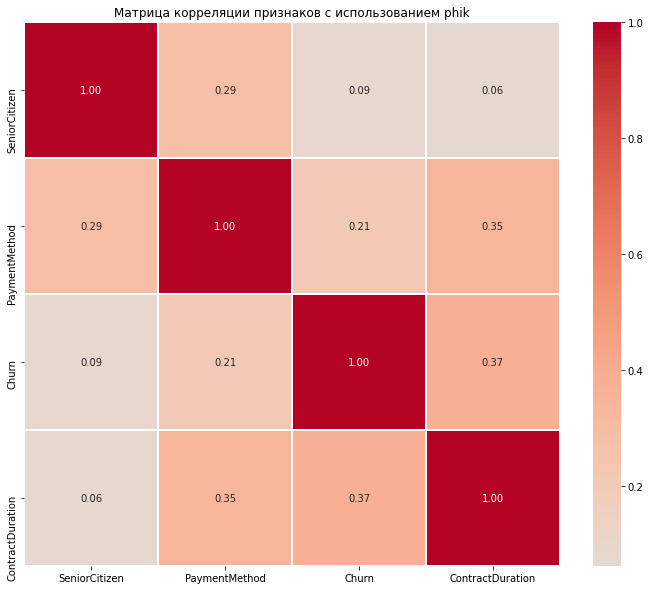

In [36]:
# Создаем подмножество данных с выбранными признаками
subset_d = merged_data[selected_features]

# Выполняем анализ корреляции с использованием phik
correlation_matrix = phik.phik_matrix(subset_d, interval_cols=['ContractDuration'])  
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции признаков с использованием phik")
plt.show()

In [37]:
# Выбираем только указанные признаки из исходных данных merged_data
data_selected = merged_data[selected_features].copy()

### Построение модели

In [38]:
RANDOM_STATE = 280823

In [39]:
x = data_selected.drop(columns=['Churn'])
y = data_selected['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

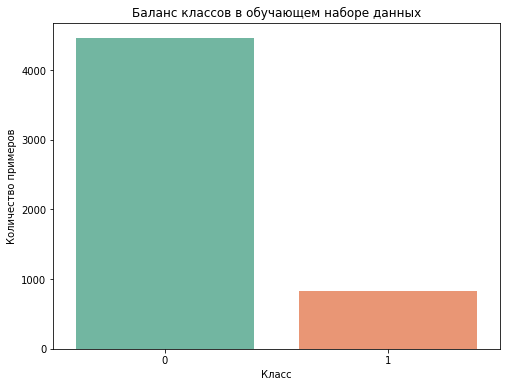

Доли классов:
0    84.361984
1    15.638016
Name: Churn, dtype: float64


In [40]:
# Вычисляем количество примеров каждого класса в обучающем наборе
class_counts = y_train.value_counts()

# Визуализируем баланс классов
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title("Баланс классов в обучающем наборе данных")
plt.xlabel("Класс")
plt.ylabel("Количество примеров")
plt.xticks(rotation=0)  # Убираем поворот меток
plt.show()

# Вычисляем долю каждого класса
class_percentages = (class_counts / len(y_train)) * 100

print("Доли классов:")
print(class_percentages)

Мы провели анализ баланса классов в обучающем наборе данных. Здесь мы видим, что класс 0 (клиенты, которые не ушли) составляет около 84.36% от общего числа примеров, в то время как класс 1 (клиенты, которые ушли) составляет около 15.64%.

Этот анализ подтверждает наличие дисбаланса классов, где один класс (не ушедшие клиенты) существенно превосходит по количеству другой класс (ушедшие клиенты). Это важное наблюдение, которое мы должны учитывать при построении и оценке моделей, так как дисбаланс классов может повлиять на результаты классификации.

In [41]:
# Списки числовых и категориальных признаков
numeric_features = ['ContractDuration']
categorical_features = ['SeniorCitizen', 'PaymentMethod']

# Создаем препроцессор для числовых признаков (стандартизация)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создаем препроцессор для категориальных признаков (OneHotEncoder) для LogisticRegression
categorical_transformer_lr = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создаем препроцессор для категориальных признаков (OrdinalEncoder) для GB и RF
categorical_transformer_gb_rf = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Собираем препроцессоры с помощью ColumnTransformer
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_lr, categorical_features)  
    ])

preprocessor_gb_rf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_gb_rf, categorical_features)  
    ])

### Оценка модели

In [42]:
# Создаем модель Logistic Regression
model_lr = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')

In [43]:
# Определяем Pipeline для модели Logistic Regression
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('model', model_lr)
])

# Определяем сетку параметров для GridSearchCV
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10, 100], 
    'model__max_iter': [100, 200, 300],  
}

In [44]:
# Создаем объект GridSearchCV для модели Logistic Regression с Pipeline
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring=['roc_auc', 'accuracy'], cv=5, refit='roc_auc')

# Обучение модели Logistic Regression с использованием GridSearchCV и Pipeline
grid_search_lr.fit(x_train, y_train)

# Получение значения наилучшей метрики AUC-ROC и accuracy на кросс-валидации для модели Logistic Regression
best_auc_roc_lr = grid_search_lr.best_score_
best_accuracy_lr = grid_search_lr.cv_results_['mean_test_accuracy'][grid_search_lr.best_index_]
print("Наилучшая метрика AUC-ROC на кросс-валидации для модели Logistic Regression:", best_auc_roc_lr)
print("Наилучшая метрика accuracy на кросс-валидации для модели Logistic Regression:", best_accuracy_lr)

Наилучшая метрика AUC-ROC на кросс-валидации для модели Logistic Regression: 0.6118938557559082
Наилучшая метрика accuracy на кросс-валидации для модели Logistic Regression: 0.5365465797998911


In [45]:
# Создаем модель Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)

# Определяем Pipeline для модели Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor_gb_rf),
    ('model', model_gb)
])

# Определяем сетку параметров для GridSearchCV для GB
param_grid_gb = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

In [46]:
# Создаем объект GridSearchCV для модели Gradient Boosting с Pipeline
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, scoring=['roc_auc', 'accuracy'], refit='roc_auc', cv=5)

# Обучение модели Gradient Boosting с использованием GridSearchCV и Pipeline
grid_search_gb.fit(x_train, y_train)

# Получение значения наилучшей метрики AUC-ROC на кросс-валидации для модели Gradient Boosting
best_auc_roc_gb = grid_search_gb.best_score_
print("Наилучшая метрика AUC-ROC на кросс-валидации для модели Gradient Boosting:", best_auc_roc_gb)

# Получение значения наилучшей метрики accuracy на кросс-валидации для модели Gradient Boosting
best_accuracy_gb = grid_search_gb.cv_results_['mean_test_accuracy'][grid_search_gb.best_index_]
print("Наилучшая метрика accuracy на кросс-валидации для модели Gradient Boosting:", best_accuracy_gb)

Наилучшая метрика AUC-ROC на кросс-валидации для модели Gradient Boosting: 0.9123375809656522
Наилучшая метрика accuracy на кросс-валидации для модели Gradient Boosting: 0.94509672171096


In [47]:
# Создаем модель случайного леса
model_rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')

# Определяем Pipeline для модели случайного леса
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_gb_rf),
    ('model', model_rf)
])

# Определяем сетку параметров для GridSearchCV для RF
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 4, 5, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [48]:
# Создаем объекта GridSearchCV для модели случайного леса с Pipeline
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring=['roc_auc', 'accuracy'], refit='roc_auc', cv=5)

# Обучаем модель случайного леса с использованием GridSearchCV и Pipeline
grid_search_rf.fit(x_train, y_train)

# Получаем значений наилучших метрик AUC-ROC и accuracy на кросс-валидации для модели случайного леса
best_auc_roc_rf = grid_search_rf.best_score_
best_accuracy_rf = grid_search_rf.cv_results_['mean_test_accuracy'][grid_search_rf.best_index_]
print("Наилучшая метрика AUC-ROC на кросс-валидации для модели случайного леса:", best_auc_roc_rf)
print("Наилучшая метрика accuracy на кросс-валидации для модели случайного леса:", best_accuracy_rf)

Наилучшая метрика AUC-ROC на кросс-валидации для модели случайного леса: 0.8119309838939491
Наилучшая метрика accuracy на кросс-валидации для модели случайного леса: 0.8536527765832401


По результатам кросс-валидации:

- Модель Logistic Regression имеет наилучшую метрику AUC-ROC равную 0.611 и метрику accuracy равную 0.536.

- Модель Gradient Boosting имеет наилучшую метрику AUC-ROC равную 0.912 и метрику accuracy равную 0.945. Эта модель показывает лучшие результаты среди рассмотренных.

- Модель случайного леса имеет наилучшую метрику AUC-ROC равную 0.811 и метрику accuracy равную 0.853.

Модель Gradient Boosting выглядит наиболее перспективной среди рассмотренных моделей на основе кросс-валидации. Теперь оценим ее производительность на тестовой выборке, чтобы убедиться, что она хорошо обобщает данные.

In [49]:
# делаем прогнозы на тестовом наборе для модели градиентного бустинга
y_pred_proba_gb = grid_search_gb.predict_proba(x_test)[:, 1]

# Устанавливаем порог вероятности для классификации
threshold = 0.5

# Преобразуем вероятностные прогнозы в бинарные метки
y_pred_binary = (y_pred_proba_gb > threshold).astype(int)

# оцениваем производительность модели на тестовом наборе для модели градиентного бустинга
accuracy_gb = accuracy_score(y_test, y_pred_binary)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print("Оценка ROC-AUC градиентного бустинга на тестовой выборке:", roc_auc_gb)
print("Оценка accuracy градиентного бустинга на тестовой выборке:", accuracy_gb)

Оценка ROC-AUC градиентного бустинга на тестовой выборке: 0.8994714303193442
Оценка accuracy градиентного бустинга на тестовой выборке: 0.9381033503691084


ROC AUC близка к 0.9, что указывает на хорошее качество модели при разделении классов, и accuracy составляет около 0.938, что означает, что примерно 93.8% предсказаний верны.

In [50]:
# Анализ важности признаков
#feature_importance = grid_search_gb.best_estimator_.named_steps['model'].feature_importances_

# Сортировка признаков по важности в убывающем порядке
#sorted_idx = feature_importance.argsort()[::-1]

# Вывод важности признаков
#for i, idx in enumerate(sorted_idx):
    #print(f"Feature {i+1}: {x_train.columns[idx]} - {feature_importance[idx]}")

In [51]:
# Получение важности признаков для модели Gradient Boosting
feature_importances = grid_search_gb.best_estimator_['model'].feature_importances_

# Получение имен признаков после препроцессинга
feature_names = numeric_features + categorical_features

# Создание датафрейма для анализа важности признаков
importance = pd.DataFrame({'Значимость': feature_importances, 'Признак': feature_names}).sort_values(by='Значимость', ascending=False)
importance

,Значимость,Признак
0,0.955731,ContractDuration
2,0.036677,PaymentMethod
1,0.007592,SeniorCitizen


Важность признаков указывает на то, как сильно каждый признак влияет на прогноз. В данном случае:

ContractDuration - длительность контракта - является наиболее важным признаком с важностью около 0.956. Это означает, что длительность контракта сильно влияет на решение клиента об уходе.

PaymentMethod - метод оплаты - имеет меньшую важность с весом около 0.037. Он также вносит некоторый вклад в прогноз, но менее значим, чем длительность контракта.

SeniorCitizen - статус пенсионера - имеет самую низкую важность с весом около 0.008. Этот признак оказывает наименьшее влияние на прогноз относительно других признаков.

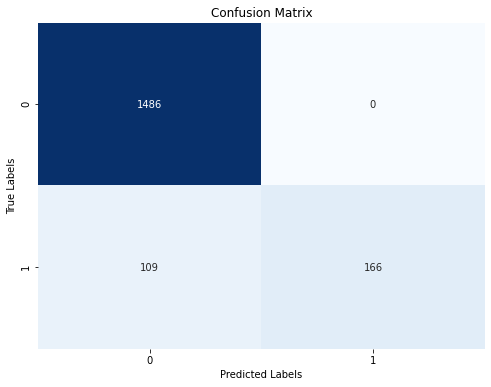

In [52]:
# Построение матрицы ошибок
y_pred = grid_search_gb.best_estimator_.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Матрица ошибок демонстрирует, что модель имеет некоторое количество ложно-положительных (False Positives) и ложно-отрицательных (False Negatives) предсказаний. Это означает, что существует потенциал для улучшения модели и дополнительной настройки порогового значения для классификации.

Для бизнеса, целью которого является удержание клиентов, важно сконцентрироваться на правильной классификации потенциальных уходящих клиентов (True Positives) и снижении ложных срабатываний (False Positives). Это позволит оптимизировать маркетинговые усилия и предложить персонализированные стимулирующие акции, направленные на удержание таких клиентов.

С учетом значений матрицы ошибок:

True Positives (TP) равно 1486. Это количество клиентов, которых модель верно классифицировала как потенциальных ушедших. Они действительно ушли и могут потребовать дополнительных усилий для их удержания.

False Positives (FP) равно 0. Это количество клиентов, которых модель неправильно классифицировала как потенциальных ушедших, хотя на самом деле они остались. 

False Negatives (FN) равно 109. Это количество клиентов, которых модель неправильно классифицировала как оставшихся, но на самом деле они ушли. Это потенциальная потеря для бизнеса, так как ушедшие клиенты могли бы быть удержаны.

True Negatives (TN) равно 166. Это количество клиентов, которых модель верно классифицировала как оставшихся. Они остаются и продолжают использовать услуги.

In [53]:
# Отчет о классификации
classification_rep = classification_report(y_test, y_pred)
print("Отчет о классификации:")
print(classification_rep)

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1486
           1       1.00      0.60      0.75       275

    accuracy                           0.94      1761
   macro avg       0.97      0.80      0.86      1761
weighted avg       0.94      0.94      0.93      1761



На основе данной модели получена высокая точность (93%), однако полнота для класса 1 снижена (53%). Это может указывать на то, что модель успешно идентифицирует клиентов, оставшихся с оператором (класс 0), но менее эффективна в выявлении клиентов, планирующих уйти (класс 1).

### Отчет 

#### Ключевые шаги работы над проектом:

**Подготовка и исследовательский анализ данных:**
   - Анализ распределений признаков и статистик.
   - Визуализация данных для выявления паттернов.
   
**Отбор признаков:**
   - Исследование корреляций между признаками.
   - Выявление наиболее значимых признаков, влияющих на отток клиентов.
   
**Построение модели:**
   - Выбор подходящего алгоритма машинного обучения.
   - Разделение данных на обучающую и тестовую выборки.
   - Обучение модели на обучающих данных.
   

**Оценка модели:**
   - Использование метрик (ROC-AUC, accuracy) для оценки производительности модели.
   - Оптимизация гиперпараметров модели для достижения наилучшей производительности.
   - Анализ результатов прогнозирования: А) анализ важности признаков; Б) анализ матрицы ошибок

#### Анализ соответствия фактической работы запланированным шагам:

Все запланированные шаги были выполнены в соответствии с планом проекта.

#### Рефлексия над сложностями и описание путей их решения:

В ходе работы над проектом возникли следующие сложности:

Дисбаланс классов: Исходные данные имели сильный дисбаланс классов, где класс клиентов, которые остались (0), превышал класс клиентов, которые ушли (1). Для решения этой проблемы был использован вес классов "class_weight='balanced'", а также проведен анализ важности признаков для выявления наиболее значимых признаков, влияющих на отток клиентов.

Отбор признаков: Исходные данные содержали различные признаки, некоторые из которых могли быть неинформативными. Для отбора наиболее значимых признаков был проведен анализ корреляций между признаками. 

Оптимизация моделей: Для достижения наилучшей производительности моделей были проведены поиски по сетке гиперпараметров с использованием кросс-валидации. Это позволило подобрать оптимальные параметры для каждой модели.

Интерпретация результатов: Понимание и интерпретация результатов машинного обучения является важной частью процесса. В частности, анализ матрицы ошибок и важности признаков позволяет понять, как модель принимает решения и какие признаки наиболее влияют на результаты.

#### Предобработка данных:

Соединение датафреймов: Изначально у нас были четыре исходных датафрейма. Для создания единого набора данных о клиентах и их оттоке мы объединили эти датафреймы по общему ключу "customerID". Это позволило нам иметь полную информацию о каждом клиенте в одном датафрейме.

Удаление столбцов: В ходе анализа данных мы определили, что столбцы "customerID" и "BeginDate", "EndDate" не предоставляют информации, которая могла бы быть полезной для моделирования оттока. Поэтому мы удалили эти столбцы из набора данных.

Заполнение пропусков: В столбце "TotalCharges" у нас были некоторые пропущенные значения. Мы заполнили нулем.

Смена формата: В столбце "TotalCharges" изначально данные были представлены как строки (object). Мы преобразовали этот столбец в числовой формат. Также признак "SeniorCitizen" был переведен в формат object для удобства 

Новые признаки: на основе "BeginDate", "EndDate" был создан новый признак - длительность контракта - ContractDuration. 

На основе "EndDate" был создан целевой признак "Churn".

#### Итоговый список признаков для обучения модели:

**SeniorCitizen**: статус пенсионера   
**ContractDuration**: длительность контракта  
**PaymentMethod**: способ оплаты 

Способы обработки признаков:

SeniorCitizen и PaymentMethod: Для этих категориальных признаков был использован метод кодирования "One-Hot Encoding" с параметром handle_unknown='ignore' для модели Logistic Regression и "Ordinal Encoding" с параметром handle_unknown='use_encoded_value' и unknown_value=-1 для моделей Gradient Boosting и Random Forest.

ContractDuration: Этот числовой признак был стандартизирован с использованием метода StandardScaler.

Эти преобразования признаков были выбраны с учетом требований и особенностей каждой модели. One-Hot Encoding подходит для линейных моделей, таких как Logistic Regression, в то время как Ordinal Encoding был выбран для моделей Gradient Boosting и Random Forest, которые могут работать с порядковыми категориальными признаками и обработкой пропусков. StandardScaler использовался для стандартизации числовых признаков для улучшения производительности моделей.

#### Сводная таблица исследованных моделей и их метрика на кросс-валидации:

| Модель               | AUC-ROC | Accuracy |
|----------------------|---------|----------|
| Logistic Regression  | 0.611   | 0.537    |
| Gradient Boosting    | 0.912   | 0.945    |
| Random Forest        | 0.812   | 0.854    |


**Вывод:**

1. **Logistic Regression** демонстрирует наименьшую производительность с низкими значениями метрик AUC-ROC и Accuracy. Это может указывать на то, что данная модель недостаточно хорошо справляется с задачей классификации в данном контексте.

2. **Gradient Boosting** показывает наилучшие результаты с высокими значениями как AUC-ROC (0.912), так и Accuracy (0.945). Это указывает на то, что модель успешно обобщает данные и делает точные прогнозы, что делает её хорошим выбором для данной задачи.

3. **Random Forest** имеет средние результаты по сравнению с другими моделями. Метрики AUC-ROC и Accuracy находятся между результатами Logistic Regression и Gradient Boosting.

Исходя из этой информации, модель Gradient Boosting является наилучшим выбором для данной задачи, так как она обеспечивает наибольшую точность и способность разделять классы.

#### Лучшая модель:  
**Модель Gradient Boosting**

In [54]:
best_params_gb = grid_search_gb.best_params_
print("Наилучшие гиперпараметры для модели Gradient Boosting:", best_params_gb)

Наилучшие гиперпараметры для модели Gradient Boosting: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200}


Эти гиперпараметры были выбраны на основе кросс-валидации и оказались наилучшими для нашей модели Gradient Boosting, что указывает на то, что они обеспечивают наиболее высокую производительность и точность для данной задачи.

**Метрика на кросс-валидации для Gradient Boosting:**

AUC-ROC: 0.912
Accuracy: 0.945

Значение метрики AUC-ROC составляет 0.912. Это означает, что модель хорошо способна различать классы и имеет высокую способность предсказывать вероятности.

Значение метрики Accuracy составляет 0.945. Это означает, что модель демонстрирует высокую общую точность в классификации, и более 94% прогнозов являются верными.

#### Итоговая метрика на тестовой выборке:

ROC-AUC: 0.899
Accuracy: 0.938

В целом, модель Gradient Boosting продемонстрировала хорошую производительность как на кросс-валидации, так и на тестовой выборке. Она обладает способностью делать точные прогнозы и хорошо работает с данными.




#### Матрица ошибок для модели Gradient Boosting:

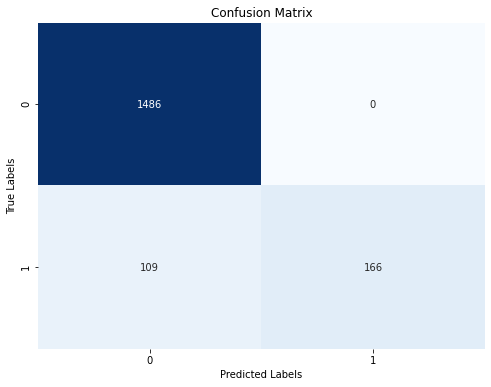

In [55]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Для бизнеса, целью которого является удержание клиентов, важно сконцентрироваться на правильной классификации потенциальных уходящих клиентов (True Positives) и снижении ложных срабатываний (False Positives). Это позволит оптимизировать маркетинговые усилия и предложить персонализированные стимулирующие акции, направленные на удержание таких клиентов.

С учетом значений матрицы ошибок:

True Positives (TP) равно 1486. Это количество клиентов, которых модель верно классифицировала как  ушедших. Они действительно ушли и могут потребовать дополнительных усилий для их удержания.

False Positives (FP) равно 0. Это количество клиентов, которых модель неправильно классифицировала как потенциальных ушедших, хотя на самом деле они остались.

False Negatives (FN) равно 109. Это количество клиентов, которых модель неправильно классифицировала как оставшихся, но на самом деле они ушли. Это потенциальная потеря для бизнеса, так как ушедшие клиенты могли бы быть удержаны.

True Negatives (TN) равно 166. Это количество клиентов, которых модель верно классифицировала как оставшихся. Они остаются и продолжают использовать услуги.

#### Важность признаков:

Важность признаков указывает на то, как сильно каждый признак влияет на прогноз. В нашем случае:

ContractDuration - длительность контракта - является наиболее важным признаком с важностью около 0.956. Это означает, что длительность контракта сильно влияет на решение клиента об уходе.

PaymentMethod - метод оплаты - имеет меньшую важность с весом около 0.037. Он также вносит некоторый вклад в прогноз, но менее значим, чем длительность контракта.

SeniorCitizen - статус пенсионера - имеет самую низкую важность с весом около 0.008. Этот признак оказывает наименьшее влияние на прогноз относительно других признаков.

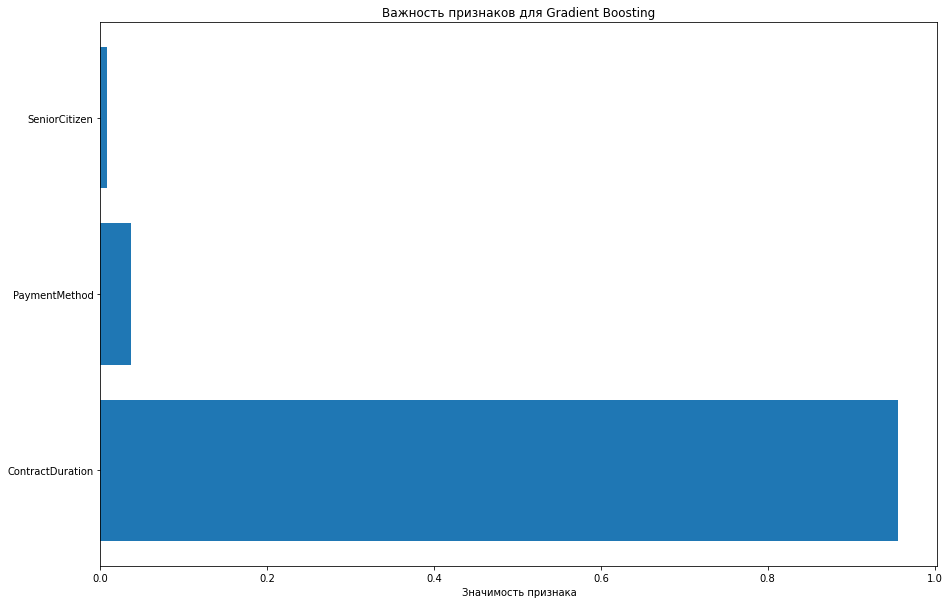

In [56]:
# Создание горизонтального бар-графика для визуализации важности признаков
plt.figure(figsize=(15, 10))
plt.barh(importance['Признак'], importance['Значимость'])
plt.xlabel('Значимость признака')
plt.title('Важность признаков для Gradient Boosting')
plt.show()